N-1 Over predictor


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv('Final_Dataset_LSTM.csv',index_col=0)

In [ ]:
df.head()

,id,season,venue,batting_team,bowling_team,innings,over,runs
0,1000887,2016/17,"Brisbane Cricket Ground, Woolloongabba",Australia,Pakistan,1,1,0
1,1000887,2016/17,"Brisbane Cricket Ground, Woolloongabba",Australia,Pakistan,1,2,1
2,1000887,2016/17,"Brisbane Cricket Ground, Woolloongabba",Australia,Pakistan,1,3,3
3,1000887,2016/17,"Brisbane Cricket Ground, Woolloongabba",Australia,Pakistan,1,4,6
4,1000887,2016/17,"Brisbane Cricket Ground, Woolloongabba",Australia,Pakistan,1,5,2


In [ ]:
data=df[(df['id']==1000887) & (df['innings']==1)]

In [ ]:
data.count()

id              50
season          50
venue           50
batting_team    50
bowling_team    50
innings         50
over            50
runs            50
dtype: int64

In [ ]:
#data=pd.get_dummies(data,['venue','batting_team','bowling_team'])

In [ ]:
data=data.drop(['id','season','over','venue','batting_team','bowling_team','innings'],axis=1)
data.head()

,runs
0,0
1,1
2,3
3,6
4,2


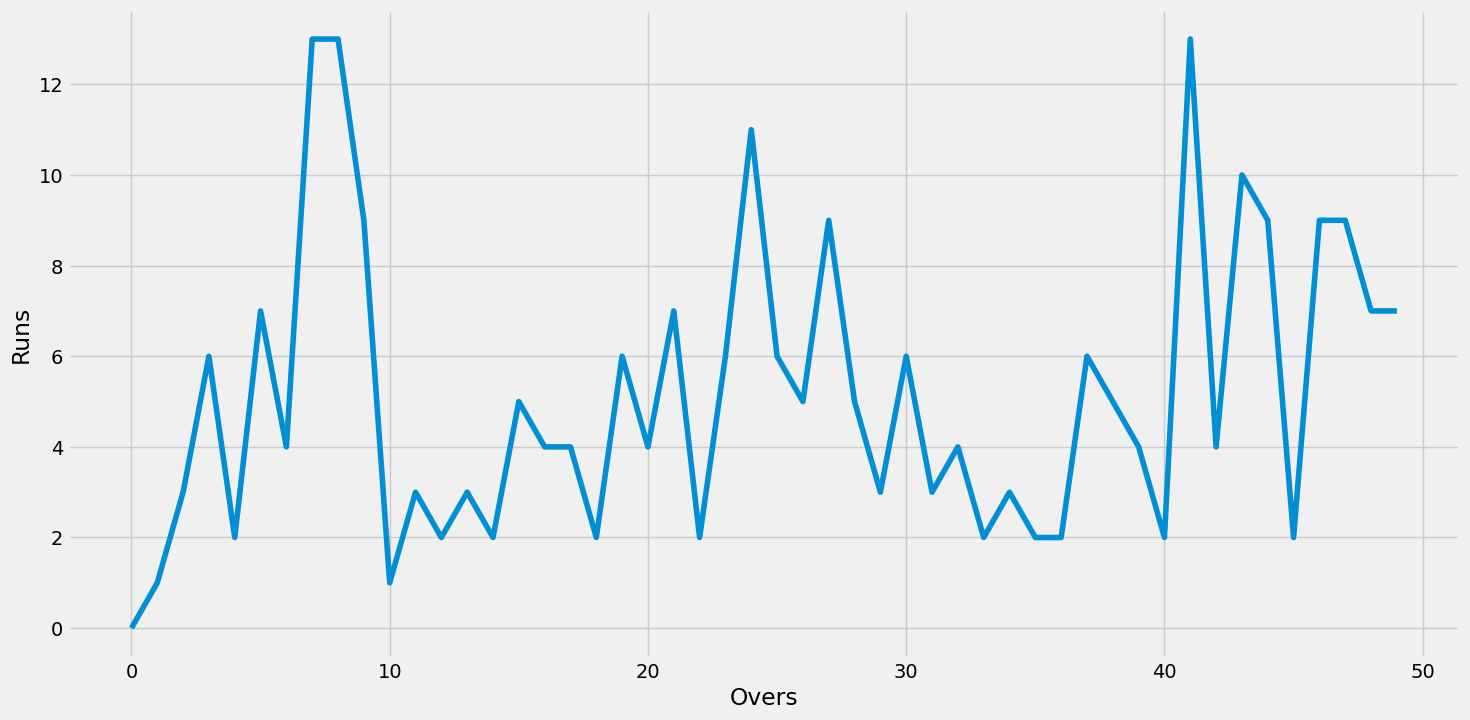

In [ ]:
plt.figure(figsize=(16,8))
plt.xlabel('Overs')
plt.ylabel('Runs')
plt.plot(data['runs'])
plt.show()

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)

In [ ]:
x_train=[]
y_train=[]
for i in range(10, len(scaled_data)):
  x_train.append(scaled_data[i-10:i,0])
  y_train.append(scaled_data[i,0])

In [ ]:
np.array(y_train).shape

(40,)

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) # incase of more features make 1 to number of features

In [ ]:
x_train.shape

(40, 10, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

LSTM

In [ ]:
import os
import time
import warnings
import numpy as np
from numpy import newaxis
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(3, return_sequences=True ,input_shape=(x_train.shape[1],1)))
model.add(LSTM(3,return_sequences=False))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(X_train,y_train,batch_size=1,epochs=5)

Epoch 1/5
32/32 [==============================] - 8s 5ms/step - loss: 0.1916
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.1432
Epoch 3/5
32/32 [==============================] - 0s 7ms/step - loss: 0.0968
Epoch 4/5
32/32 [==============================] - 0s 7ms/step - loss: 0.0637
Epoch 5/5
32/32 [==============================] - 0s 7ms/step - loss: 0.0547


In [ ]:
predictions=model.predict(X_test)

predictions=scaler.inverse_transform(predictions)
print(predictions)

1/1 [==============================] - 0s 20ms/step
[[5.1370826]
 [4.9733853]
 [4.9467573]
 [4.8558536]
 [5.0898976]
 [4.7690115]
 [5.165211 ]
 [4.799591 ]]


In [ ]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

4.630560310987326

TESTING FOR ALL FIRST INNING MATCHES

In [ ]:
rmse_values=[]
def test(ids):
  for id in ids:
    data=df[(df['id']==id) & (df['innings']==1)]
    data=data.drop(['id','season','over','venue','batting_team','bowling_team','innings'],axis=1)
    scaler=MinMaxScaler(feature_range=(0,1))
    scaled_data=scaler.fit_transform(data)
    x_train=[]
    y_train=[]
    for i in range(10, len(scaled_data)):
      x_train.append(scaled_data[i-10:i,0])
      y_train.append(scaled_data[i,0])
    np.array(y_train).shape
    x_train,y_train=np.array(x_train),np.array(y_train)
    x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
    X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
    #model
    model=Sequential()
    model.add(LSTM(3, return_sequences=True ,input_shape=(x_train.shape[1],1)))
    model.add(LSTM(4,return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mean_squared_error')
    model.fit(X_train,y_train,batch_size=1,epochs=5)
    predictions=model.predict(X_test)
    predictions=scaler.inverse_transform(predictions)
    rmse=np.sqrt(np.mean(predictions-y_test)**2)
    rmse_values.append(rmse)


In [ ]:
arr=df['id'].unique()[:100]

In [ ]:
test(arr)

Epoch 1/5
32/32 [==============================] - 3s 5ms/step - loss: 0.2369
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.1519
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0998
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0651
Epoch 5/5
1/1 [==============================] - 1s 617ms/step
Epoch 1/5
32/32 [==============================] - 3s 5ms/step - loss: 0.1373
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0792
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0586
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0571
Epoch 5/5
1/1 [==============================] - 1s 848ms/step
Epoch 1/5
32/32 [==============================] - 4s 5ms/step - loss: 0.0936
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0602
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0566
Epoch 4/5
32/32 

1/1 [==============================] - 1s 622ms/step
Epoch 1/5
32/32 [==============================] - 4s 7ms/step - loss: 0.0871
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 0.0589
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0590
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0570
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0582


1/1 [==============================] - 1s 636ms/step
Epoch 1/5
32/32 [==============================] - 3s 5ms/step - loss: 0.1264
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0697
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0578
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0564
Epoch 5/5
1/1 [==============================] - 1s 615ms/step
Epoch 1/5
32/32 [==============================] - 3s 5ms/step - loss: 0.2128
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.1174
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0689
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0559
Epoch 5/5
1/1 [==============================] - 1s 891ms/step
Epoch 1/5
32/32 [==============================] - 3s 5ms/step - loss: 0.1622
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.1020
Epoch 3/5
32/32 [========================

In [ ]:
np.mean(rmse_values)

4.716469198969696